<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/8)_A)_ON_Negative_Tweets_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##For the final part - I'm going to run LDA on just the negative tweets - and analyze them in stage 11 

In [ ]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis

!pip install -U scikit-learn # updating sklearn to avoid depreciation warnings
!pip install --upgrade pandas==1.2  # Need to upgrade pandas to get pyLDAvis to work 

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

In [2]:
# Upload negative tweets
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_NEG_COVID19_TWEETS.csv')
tweets_df = data.iloc[:, 1:]
tweets_list = tweets_df['Text'].tolist()

In [3]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf = tf_vectorizer.fit_transform(tweets_list) # document-term matrix
alpha = 1     #Dirichlet prior of document-topic dist
beta = 0.05   #Dirichlet prior of topic-term dist

In [4]:
lda_model3 = LatentDirichletAllocation(n_components=3, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 3 Topics:',lda_model3.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 3 Topics:', lda_model3.score(tf))
#Model Perplexity - 3 Topics: 18362.38447652381
#Model Log-Likelihood - 3 Topics: -40086282.886506446

Model Perplexity - 3 Topics: 18362.38447652381
Model Log-Likelihood - 3 Topics: -40086282.886506446


In [5]:
lda_model4 = LatentDirichletAllocation(n_components=4, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 4 Topics:',lda_model4.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 4 Topics:', lda_model4.score(tf))
#Model Perplexity - 4 Topics: 18123.1321603212
#Model Log-Likelihood - 4 Topics: -40032735.04154951

Model Perplexity - 4 Topics: 18123.1321603212
Model Log-Likelihood - 4 Topics: -40032735.04154951


In [12]:
lda_model5 = LatentDirichletAllocation(n_components=5, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 5 Topics:',lda_model5.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 5 Topics:', lda_model5.score(tf))
#Model Perplexity - 5 Topics: 17890.759763915314
#Model Log-Likelihood - 5 Topics: -39980045.95997456

Model Perplexity - 5 Topics: 17890.759763915314
Model Log-Likelihood - 5 Topics: -39980045.95997456


In [13]:
lda_model6 = LatentDirichletAllocation(n_components=6, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
print('Model Perplexity - 6 Topics:',lda_model6.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 6 Topics:', lda_model6.score(tf))
#Model Perplexity - 6 Topics: 18172.48305659965
#Model Log-Likelihood - 6 Topics: -40043838.06536908

Model Perplexity - 6 Topics: 18172.48305659965
Model Log-Likelihood - 6 Topics: -40043838.06536908


In [14]:
pyLDAvis.enable_notebook()
display_data = pyLDAvis.sklearn.prepare(lda_model5, tf, tf_vectorizer)                 
pyLDAvis.display(display_data)  

##Below are screen shots of the terminal produced by the code above as the terminal doesnt show in git repo

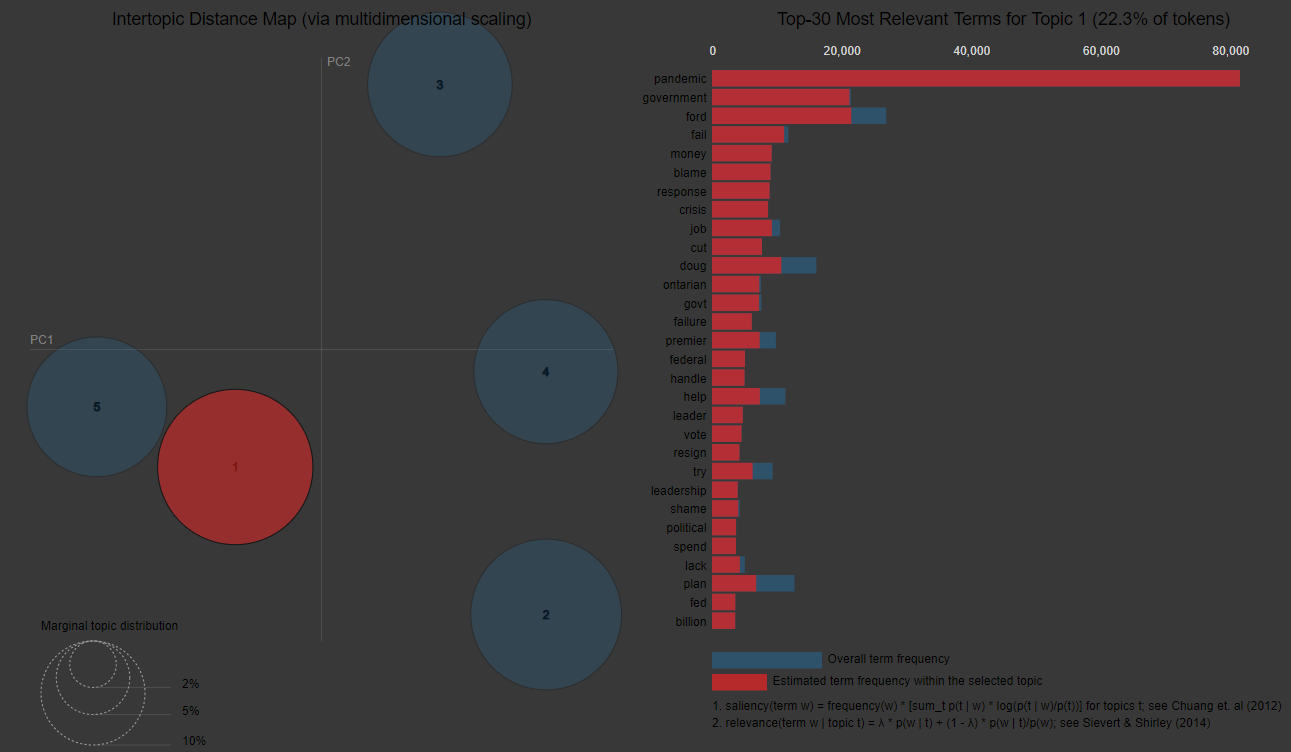

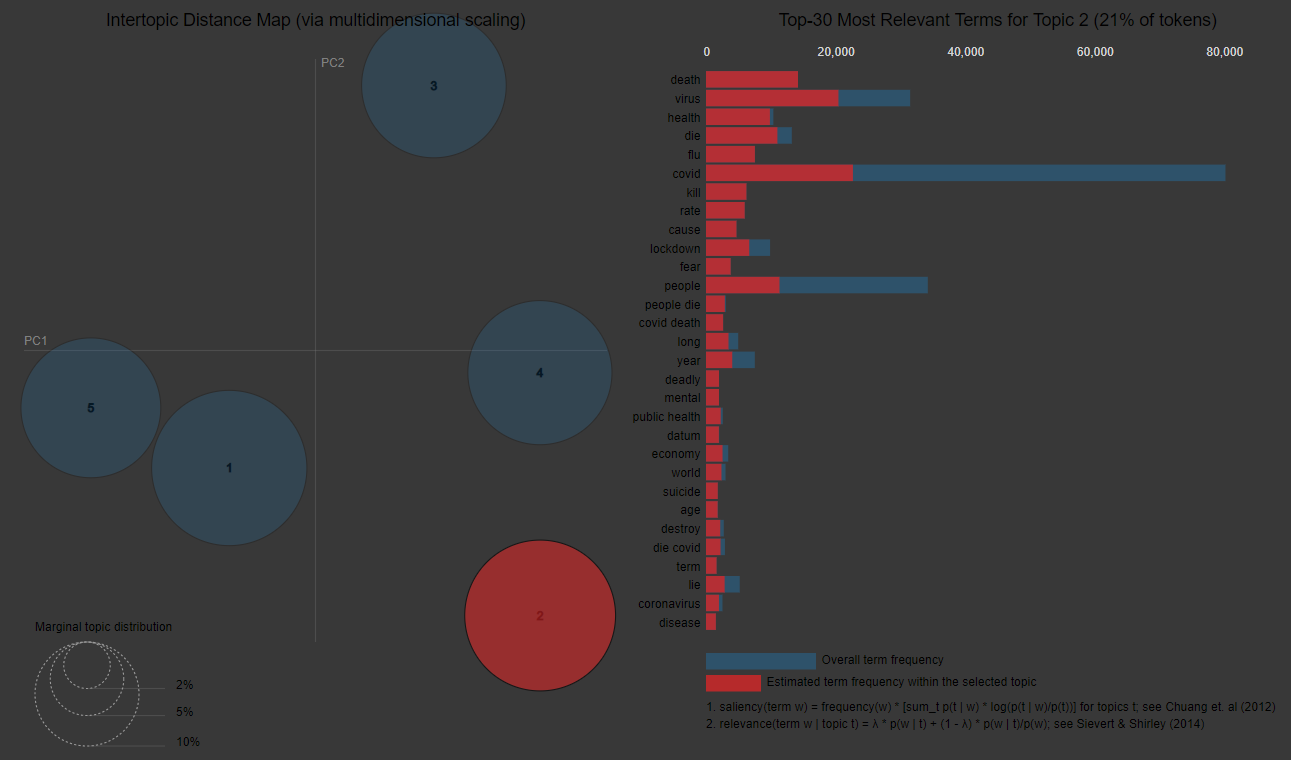

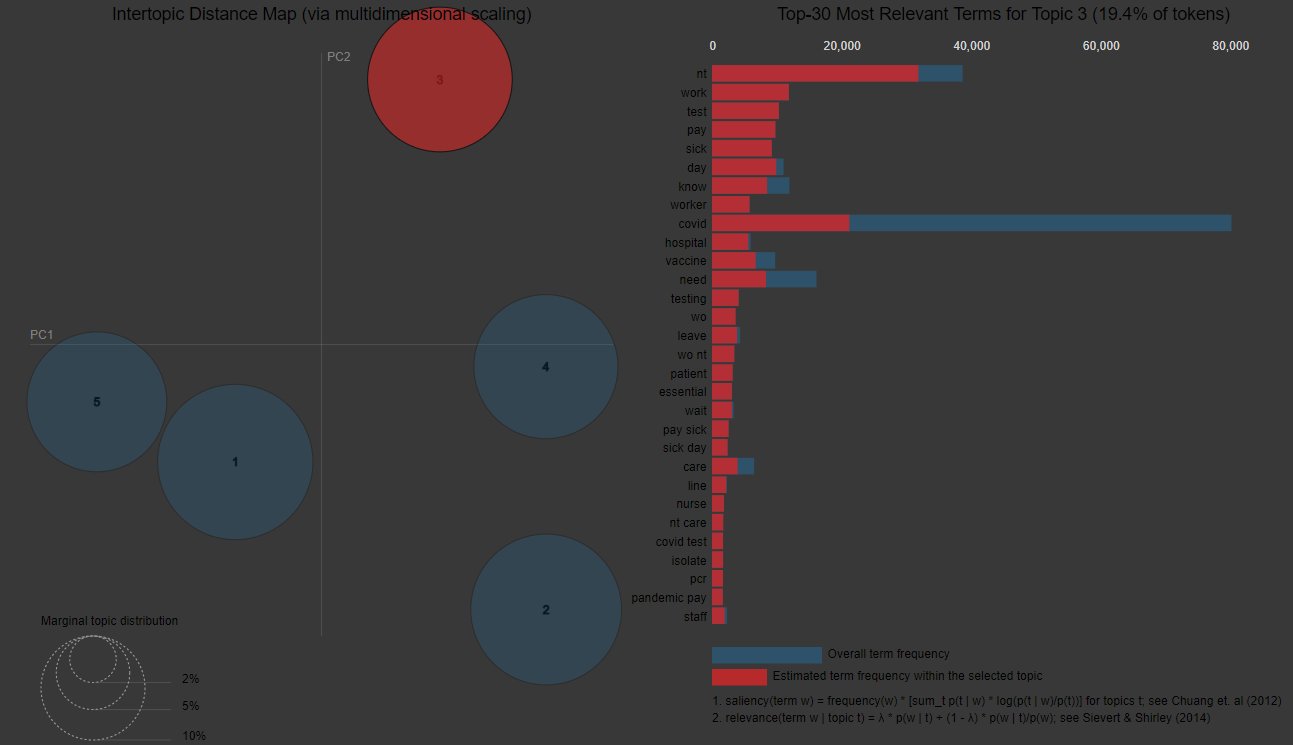

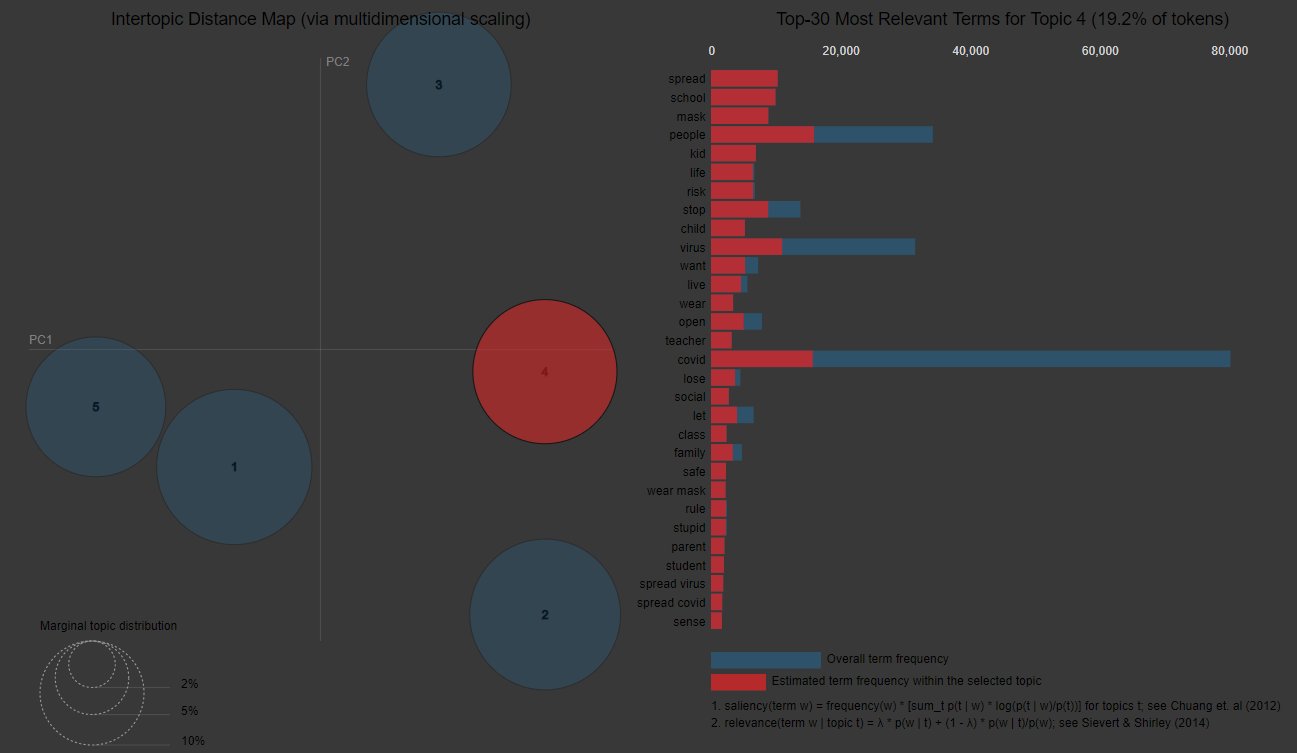

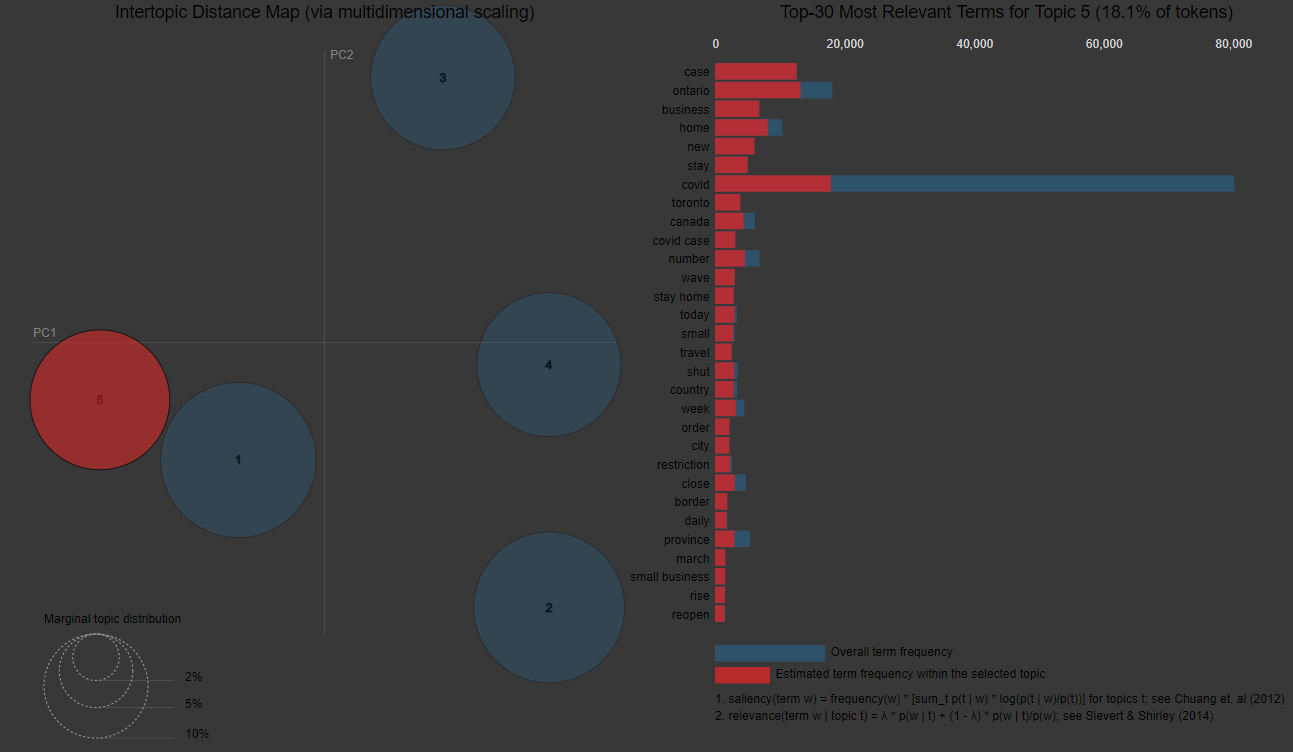

In [5]:
from IPython.display import Image, display

listOfImageNames = ['/content/drive/MyDrive/Colab Notebooks/neg topic 1 .png',
                    '/content/drive/MyDrive/Colab Notebooks/neg topic 2 - ON.png',
                    '/content/drive/MyDrive/Colab Notebooks/neg topic 3 - ON .png',
                    '/content/drive/MyDrive/Colab Notebooks/neg topic 4 - ON.png', 
                    '/content/drive/MyDrive/Colab Notebooks/neg topic 5 - ON .png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [19]:
# Getting predicted topic for each tweet 
tweet_topics = lda_model5.transform(tf)

Topic_Assigned = [] 
for t in range(tweet_topics.shape[0]):
  predicted_topic = tweet_topics[t].argmax()
  Topic_Assigned.append(predicted_topic)
  predicted_topic = None

print(Topic_Assigned[:10])

tweets_df['Topic_Neg'] = Topic_Assigned
tweets_df[:3]

[1, 0, 4, 0, 1, 2, 4, 0, 2, 3]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_Neg
0,2021-05-31,be nt pandemic hell attend hundred thousand si...,arent we in a pandemic who the hell is atte...,-0.8360,8.200,negative,1,1
1,2021-05-31,poor doctor tonight likely pass million billin...,here is one of those poor doctors here ton...,-0.4767,26.165,negative,2,0
2,2021-05-31,resident sick covid family court bankrupt jail...,how about if you make a resident sick with co...,-0.3818,30.910,negative,1,4


In [20]:
tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ONTARIO_NEG_COVID19_TWEETS_TOPICS.csv')

In [21]:
def get_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keys = get_topics(tf_vectorizer, lda_model5, 40)

df_topic_keys = pd.DataFrame(topic_keys)
df_topic_keys.columns = ['Word '+str(i) for i in range(df_topic_keys.shape[1])]
df_topic_keys.index = ['Topic '+str(i) for i in range(df_topic_keys.shape[0])]

In [22]:
# Getting top words for each topic 
Topics_theme = ['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5']
df_topic_keys['topic_theme'] = Topics_theme
df_topic_keys.set_index('topic_theme', inplace=True)
print(df_topic_keys.T)

topic_theme      Topic1     Topic2       Topic3        Topic4         Topic5
Word 0         pandemic         nt        covid        people          covid
Word 1             ford      covid      ontario         covid          virus
Word 2       government       work         case         virus          death
Word 3             fail       test         home        spread         people
Word 4          ontario        day     business        school            die
Word 5             doug        pay          new          mask         health
Word 6              job       sick         stay          stop            flu
Word 7            money       know       number           kid       lockdown
Word 8            blame       need       canada            nt           kill
Word 9         response    vaccine      toronto          risk           rate
Word 10          crisis     worker         week          life          cause
Word 11            time   hospital   covid case          want           year

In [23]:
df_topic_keys.T.to_csv('/content/drive/MyDrive/Colab Notebooks/TOPIC_WORDS_NEG_ON.csv')